<a href="https://colab.research.google.com/github/Yashwardhan-Ai/Androidgdsc/blob/main/GDSC_Event_Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


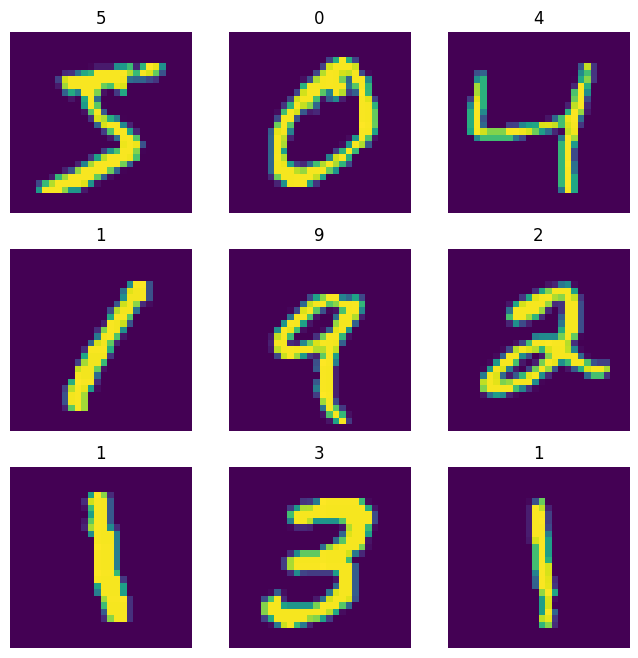

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

Normalization is a preprocessing step in machine learning where the features (in this case, the input data x_train and x_test) are adjusted to have a mean of 0 and a standard deviation of 1, or to scale the values to a range between 0 and 1.

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

Building Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
#Flattens the 28x28 pixel images into a 1D array of 784 elements.
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
#This adds a fully connected Dense layer to the model with 128 neurons.
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
#This adds a fully connected Dense layer to the model with 64 neurons.
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
#This adds a fully connected Dense layer to the model with 32 neurons.
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#This adds a fully connected Dense layer to the model with 10 output neurons for multiclass classification.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6425 - accuracy: 0.7969 - val_loss: 0.4497 - val_accuracy: 0.8939
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2653 - accuracy: 0.9209 - val_loss: 0.3126 - val_accuracy: 0.9290
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1877 - accuracy: 0.9441 - val_loss: 0.2675 - val_accuracy: 0.9418
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1484 - accuracy: 0.9551 - val_loss: 0.2165 - val_accuracy: 0.9516
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1227 - accuracy: 0.9627 - val_loss: 0.1958 - val_accuracy: 0.9589
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1021 - accuracy: 0.9688 - val_loss: 0.2318 - val_accuracy: 0.9547
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0885 - accuracy: 0.9723 - val_loss: 0.2029 - val_accuracy: 0.9615
Ep

In [ ]:
import cv2

In [24]:
image = cv2.imread('7.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 104ms/step
7


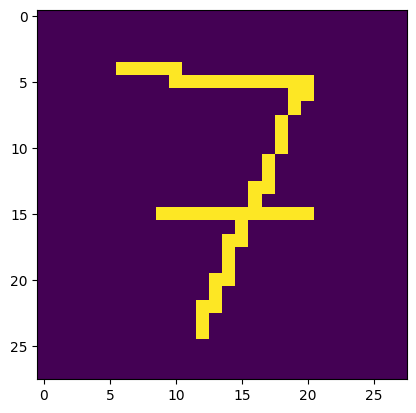

In [25]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [ ]:
model.save('/content/hand_written_Digit_recog_model.keras')